In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

In [12]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.4568 - loss: 1.5483 - val_accuracy: 0.5641 - val_loss: 1.2536 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.5804 - loss: 1.1984 - val_accuracy: 0.5740 - val_loss: 1.2045 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.6051 - loss: 1.1218 - val_accuracy: 0.5946 - val_loss: 1.1571 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6204 - loss: 1.0848 - val_accuracy: 0.5997 - val_loss: 1.1445 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.6357 - loss: 1.0418 - val_accuracy: 0.6049 - val_loss: 1.1354 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6450 - loss: 1.0142 - val_accuracy: 0.6066 - val_loss: 1.1147 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.6601 - l

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,116,384 (57.66 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 267,798 (1.02 MB)

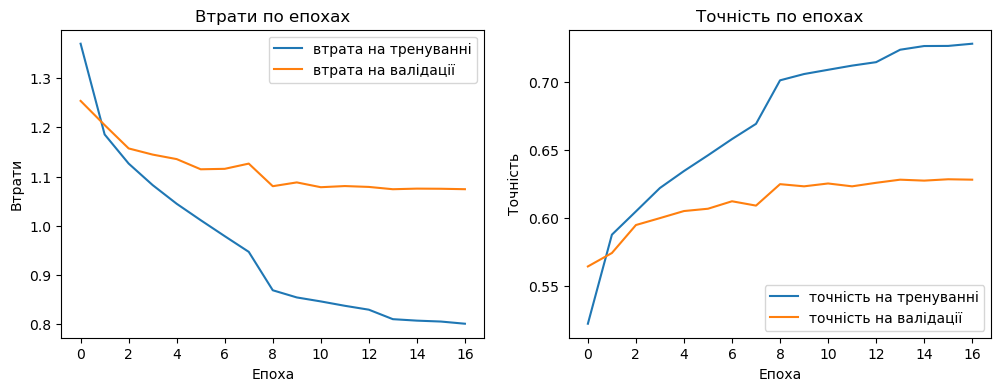

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='втрата на тренуванні')
plt.plot(history.history['val_loss'], label='втрата на валідації')
plt.title('Втрати по епохах')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='точність на валідації')
plt.title('Точність по епохах')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.show()

In [50]:
from sklearn.metrics import classification_report
import numpy as np

predictions = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)
report = classification_report(true_labels, predictions, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      1000
           1       0.67      0.72      0.69      1000
           2       0.55      0.53      0.54      1000
           3       0.48      0.43      0.46      1000
           4       0.57      0.57      0.57      1000
           5       0.56      0.53      0.55      1000
           6       0.65      0.69      0.67      1000
           7       0.68      0.70      0.69      1000
           8       0.75      0.75      0.75      1000
           9       0.63      0.65      0.64      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



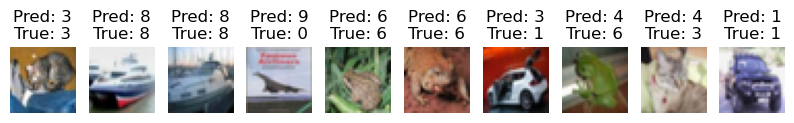

In [51]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {predictions[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()